In [46]:
import numpy as np
import pandas as pd
df = pd.read_csv("ICU_Challenge_Dataset.csv")

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,...,Platelets_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
0,132539,6,1,0,54.0,0.0,NaN,NaN,0,0,...,185.0,NaN,NaN,9.4,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,0,76.0,1.0,175.3,76.0,0,1,...,135.0,NaN,NaN,13.3,81.6,7.37,71.0,360.0,0.0,5.0
2,132541,21,11,0,44.0,0.0,NaN,56.7,0,0,...,113.0,NaN,NaN,6.2,56.7,7.47,617.0,2160.0,1.0,14.0
3,132543,7,1,0,68.0,1.0,180.3,84.6,0,0,...,284.0,NaN,NaN,7.9,84.6,NaN,NaN,NaN,NaN,NaN
4,132545,17,2,0,88.0,0.0,NaN,NaN,0,0,...,97.0,NaN,NaN,4.8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,1.0,NaN,80.0,0,0,...,221.0,NaN,NaN,11.5,NaN,7.46,238.0,2440.0,1.0,17.0
5996,151383,13,2,0,90.0,0.0,157.5,72.0,1,0,...,305.0,NaN,NaN,12.1,68.5,NaN,NaN,NaN,NaN,NaN
5997,149623,12,9,0,72.0,0.0,NaN,185.0,1,0,...,167.0,NaN,0.02,12.7,NaN,7.39,188.0,1200.0,0.0,10.0
5998,145366,18,11,1,52.0,1.0,182.9,95.9,0,0,...,28.0,NaN,NaN,5.8,96.2,7.36,100.0,2760.0,1.0,27.0


In [47]:
df.isnull().sum() # I check the missing values

recordid                0
SAPS-I                  0
SOFA                    0
In-hospital_death       0
Age                     0
                     ... 
pH_last              1478
MechVentStartTime    2256
MechVentDuration     2256
MechVentLast8Hour    2256
UrineOutputSum       2256
Length: 121, dtype: int64

In [48]:
#print name of parameters considered

list(df.columns)


['recordid',
 'SAPS-I',
 'SOFA',
 'In-hospital_death',
 'Age',
 'Gender',
 'Height',
 'Weight',
 'CCU',
 'CSRU',
 'SICU',
 'DiasABP_first',
 'GCS_first',
 'Glucose_first',
 'HR_first',
 'MAP_first',
 'NIDiasABP_first',
 'NIMAP_first',
 'NISysABP_first',
 'RespRate_first',
 'SaO2_first',
 'SysABP_first',
 'Temp_first',
 'DiasABP_last',
 'GCS_last',
 'Glucose_last',
 'HR_last',
 'MAP_last',
 'NIDiasABP_last',
 'NIMAP_last',
 'NISysABP_last',
 'RespRate_last',
 'SaO2_last',
 'SysABP_last',
 'Temp_last',
 'DiasABP_lowest',
 'GCS_lowest',
 'Glucose_lowest',
 'HR_lowest',
 'MAP_lowest',
 'NIDiasABP_lowest',
 'NIMAP_lowest',
 'NISysABP_lowest',
 'RespRate_lowest',
 'SaO2_lowest',
 'SysABP_lowest',
 'Temp_lowest',
 'DiasABP_highest',
 'GCS_highest',
 'Glucose_highest',
 'HR_highest',
 'MAP_highest',
 'NIDiasABP_highest',
 'NIMAP_highest',
 'NISysABP_highest',
 'RespRate_highest',
 'SaO2_highest',
 'SysABP_highest',
 'Temp_highest',
 'DiasABP_median',
 'GCS_median',
 'Glucose_median',
 'HR_medi

In [49]:
#I can look at the histograms
#df.hist(figsize=(100,100))

In [50]:
#check dimension
len(df)

6000

In [51]:
#I consider only dead patients
df_dead = df.loc[df['In-hospital_death']==1]
df_dead

,recordid,SAPS-I,SOFA,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,...,Platelets_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
7,132551,19,8,1,78.0,0.0,162.6,48.4,0,0,...,102.0,3.1,NaN,23.5,48.4,7.37,1090.0,1710.0,1.0,12.0
20,132588,-1,7,1,48.0,0.0,154.9,42.3,0,0,...,130.0,NaN,NaN,6.5,NaN,NaN,NaN,NaN,NaN,NaN
26,132598,22,5,1,80.0,0.0,NaN,60.0,0,0,...,185.0,NaN,NaN,20.2,NaN,7.48,74.0,2675.0,1.0,18.0
29,132602,13,1,1,80.0,1.0,180.3,70.0,0,0,...,309.0,NaN,NaN,14.1,NaN,7.53,2859.0,0.0,1.0,1.0
30,132605,21,9,1,90.0,0.0,NaN,55.0,0,0,...,327.0,NaN,NaN,10.0,NaN,7.39,67.0,2735.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,147018,23,13,1,68.0,1.0,182.9,97.0,1,0,...,286.0,NaN,0.17,13.9,NaN,7.44,179.0,2610.0,1.0,14.0
5981,145436,13,13,1,81.0,0.0,NaN,60.0,0,0,...,70.0,NaN,NaN,5.6,65.1,7.37,82.0,2592.0,1.0,16.0
5987,148889,16,11,1,90.0,0.0,144.8,49.3,0,1,...,98.0,NaN,NaN,8.3,49.3,7.39,39.0,2640.0,1.0,14.0
5995,151939,19,6,1,52.0,1.0,NaN,80.0,0,0,...,221.0,NaN,NaN,11.5,NaN,7.46,238.0,2440.0,1.0,17.0


In [52]:
#I plot just the "last" parameters of all the dead patients
df_dead_last = df_dead[['DiasABP_last',
         'GCS_last',
         'Glucose_last',
         'HR_last',
         'MAP_last',
         'NIDiasABP_last',
         'NIMAP_last',
         'NISysABP_last',
         'RespRate_last',
         'SaO2_last',
         'SysABP_last',
         'Temp_last','ALP_last',
         'ALT_last',
         'AST_last',
         'Albumin_last',
         'BUN_last',
         'Bilirubin_last',
         'Cholesterol_last',
         'Creatinine_last',
         'FiO2_last',
         'HCO3_last',
         'HCT_last',
         'K_last',
         'Lactate_last',
         'Mg_last',
         'Na_last',
         'PaCO2_last',
         'PaO2_last',
         'Platelets_last',
         'TroponinI_last',
         'TroponinT_last',
         'WBC_last',
         'Weight_last',
         'pH_last',]]
df_dead_last

,DiasABP_last,GCS_last,Glucose_last,HR_last,MAP_last,NIDiasABP_last,NIMAP_last,NISysABP_last,RespRate_last,SaO2_last,...,Mg_last,Na_last,PaCO2_last,PaO2_last,Platelets_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last
7,35.0,9.0,116.0,58.0,61.0,19.0,49.67,111.0,NaN,96.0,...,1.6,137.0,24.0,94.0,102.0,3.1,NaN,23.5,48.4,7.37
20,NaN,15.0,110.0,78.0,NaN,46.0,59.67,87.0,9.0,NaN,...,1.3,133.0,NaN,NaN,130.0,NaN,NaN,6.5,NaN,NaN
26,64.0,8.0,129.0,72.0,95.0,61.0,82.33,125.0,NaN,99.0,...,2.2,146.0,29.0,126.0,185.0,NaN,NaN,20.2,NaN,7.48
29,NaN,15.0,106.0,85.0,NaN,61.0,83.00,144.0,NaN,NaN,...,2.3,137.0,35.0,61.0,309.0,NaN,NaN,14.1,NaN,7.53
30,NaN,7.0,120.0,98.0,NaN,72.0,91.00,129.0,NaN,NaN,...,1.7,137.0,43.0,91.0,327.0,NaN,NaN,10.0,NaN,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,52.0,11.0,107.0,61.0,69.0,49.0,67.00,103.0,NaN,97.0,...,2.4,141.0,42.0,124.0,286.0,NaN,0.17,13.9,NaN,7.44
5981,47.0,6.0,175.0,76.0,66.0,NaN,NaN,NaN,NaN,98.0,...,1.8,143.0,25.0,152.0,70.0,NaN,NaN,5.6,65.1,7.37
5987,46.0,6.0,164.0,130.0,68.0,NaN,NaN,NaN,NaN,98.0,...,2.9,140.0,33.0,146.0,98.0,NaN,NaN,8.3,49.3,7.39
5995,49.0,5.0,118.0,104.0,65.0,NaN,NaN,NaN,NaN,99.0,...,2.0,140.0,32.0,119.0,221.0,NaN,NaN,11.5,NaN,7.46


# Separation train/test

In [53]:
#se la colonna ha più di # (1000) NaN allora droppo la colonna
for i in df.columns:
            if (float(df[i].isnull().sum())) > 1000:
                df = df.drop(i, axis = 1)
df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,Gender,Weight,CCU,CSRU,SICU,...,WBC_first,BUN_last,Creatinine_last,HCO3_last,HCT_last,K_last,Mg_last,Na_last,Platelets_last,WBC_last
0,132539,6,1,0,54.0,0.0,NaN,0,0,1,...,11.2,8.0,0.7,28.0,30.3,4.0,1.9,136.0,185.0,9.4
1,132540,16,8,0,76.0,1.0,76.0,0,1,0,...,7.4,21.0,1.3,24.0,29.4,3.5,1.9,135.0,135.0,13.3
2,132541,21,11,0,44.0,0.0,56.7,0,0,0,...,4.2,3.0,0.3,25.0,29.4,3.7,1.7,138.0,113.0,6.2
3,132543,7,1,0,68.0,1.0,84.6,0,0,0,...,11.5,10.0,0.7,28.0,36.3,3.8,1.9,137.0,284.0,7.9
4,132545,17,2,0,88.0,0.0,NaN,0,0,0,...,3.8,25.0,1.0,20.0,30.9,4.1,1.6,139.0,97.0,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,1.0,80.0,0,0,1,...,14.5,9.0,0.6,23.0,26.8,3.6,2.0,140.0,221.0,11.5
5996,151383,13,2,0,90.0,0.0,72.0,1,0,0,...,12.4,23.0,0.7,30.0,32.0,4.0,2.0,129.0,305.0,12.1
5997,149623,12,9,0,72.0,0.0,185.0,1,0,0,...,9.6,67.0,2.8,37.0,32.0,3.4,1.7,144.0,167.0,12.7
5998,145366,18,11,1,52.0,1.0,95.9,0,0,0,...,3.1,25.0,1.0,20.0,24.7,4.9,2.1,134.0,28.0,5.8


In [54]:
#df_filled = df.fillna(df.mean())

In [55]:
#df_filled.isnull().sum()

In [56]:
X = df.drop(labels = 'In-hospital_death', axis = 'columns')
y = df['In-hospital_death']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, 
                                                    stratify=y, 
                                                    random_state= 123)
print(X_train.shape, X_test.shape)


(4200, 62) (1800, 62)


In [61]:
#I fill NaN with mean
X_train_filled = X_train.fillna(X_train.mean())
X_test_filled = X_test.fillna(X_train.mean())
X_train_filled

,recordid,SAPS-I,SOFA,Age,Gender,Weight,CCU,CSRU,SICU,GCS_first,...,WBC_first,BUN_last,Creatinine_last,HCO3_last,HCT_last,K_last,Mg_last,Na_last,Platelets_last,WBC_last
3658,141821,-1,-1,88.0,0.0,61.900000,0,0,1,15.000000,...,12.843945,25.41707,1.361799,24.225024,30.873264,4.068046,2.046234,138.886303,192.309419,12.278962
3567,141594,11,1,28.0,0.0,57.000000,0,0,1,14.000000,...,24.000000,17.00000,0.800000,29.000000,26.200000,4.400000,2.000000,139.000000,266.000000,16.600000
3991,142659,15,6,88.0,1.0,90.700000,1,0,0,15.000000,...,19.500000,39.00000,1.600000,21.000000,32.600000,3.700000,2.200000,136.000000,109.000000,15.900000
677,134268,11,3,75.0,1.0,90.800000,1,0,0,15.000000,...,11.100000,31.00000,2.000000,27.000000,28.900000,4.100000,2.700000,142.000000,229.000000,10.000000
778,134527,9,1,72.0,0.0,63.600000,1,0,0,15.000000,...,15.100000,14.00000,0.600000,27.000000,33.600000,4.100000,2.300000,137.000000,180.000000,16.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,140207,10,7,28.0,1.0,80.000000,0,0,1,10.000000,...,15.900000,14.00000,0.700000,29.000000,31.000000,4.000000,2.200000,147.000000,136.000000,11.700000
1637,136691,23,8,74.0,0.0,61.400000,0,1,0,3.000000,...,5.000000,23.00000,1.200000,31.000000,28.100000,4.200000,1.900000,139.000000,160.000000,15.500000
5449,145335,13,1,73.0,0.0,63.000000,0,0,0,15.000000,...,16.200000,25.00000,0.600000,35.000000,31.800000,4.100000,1.800000,138.000000,243.000000,15.200000
4488,143092,16,5,65.0,1.0,99.800000,0,0,0,10.000000,...,17.500000,22.00000,0.700000,26.000000,42.900000,4.000000,2.300000,152.000000,193.000000,12.100000


In [66]:
T=pd.concat([X_train_filled,X_test_filled], axis = 0)
print(T.shape)
T

(6000, 62)


,recordid,SAPS-I,SOFA,Age,Gender,Weight,CCU,CSRU,SICU,GCS_first,...,WBC_first,BUN_last,Creatinine_last,HCO3_last,HCT_last,K_last,Mg_last,Na_last,Platelets_last,WBC_last
3658,141821,-1,-1,88.0,0.0,61.9,0,0,1,15.0,...,12.843945,25.41707,1.361799,24.225024,30.873264,4.068046,2.046234,138.886303,192.309419,12.278962
3567,141594,11,1,28.0,0.0,57.0,0,0,1,14.0,...,24.000000,17.00000,0.800000,29.000000,26.200000,4.400000,2.000000,139.000000,266.000000,16.600000
3991,142659,15,6,88.0,1.0,90.7,1,0,0,15.0,...,19.500000,39.00000,1.600000,21.000000,32.600000,3.700000,2.200000,136.000000,109.000000,15.900000
677,134268,11,3,75.0,1.0,90.8,1,0,0,15.0,...,11.100000,31.00000,2.000000,27.000000,28.900000,4.100000,2.700000,142.000000,229.000000,10.000000
778,134527,9,1,72.0,0.0,63.6,1,0,0,15.0,...,15.100000,14.00000,0.600000,27.000000,33.600000,4.100000,2.300000,137.000000,180.000000,16.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5773,149608,10,1,86.0,0.0,48.3,0,0,0,15.0,...,11.100000,16.00000,0.800000,29.000000,31.200000,3.900000,2.500000,143.000000,192.000000,7.200000
1423,136164,15,8,43.0,1.0,86.3,0,0,1,15.0,...,24.200000,91.00000,5.800000,16.000000,27.100000,4.100000,2.000000,132.000000,262.000000,19.600000
837,134664,13,4,46.0,1.0,104.4,0,0,0,15.0,...,21.500000,16.00000,1.000000,22.000000,36.400000,3.800000,1.700000,135.000000,106.000000,14.100000
5473,144869,16,12,58.0,1.0,70.0,0,0,0,7.0,...,7.600000,51.00000,3.900000,17.000000,26.000000,4.100000,1.900000,142.000000,188.000000,8.100000


<AxesSubplot:>

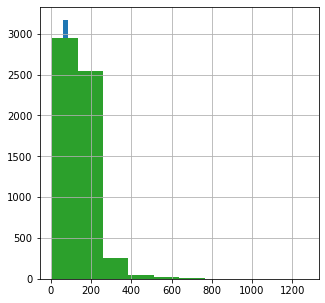

In [88]:
T.Weight.hist(figsize=(5,5)) #peso ha outlier
T.Temp_first.hist(figsize=(5,5))
T.Glucose_first.hist(figsize=(5,5)) HR_first 

<AxesSubplot:xlabel='Creatinine_last'>

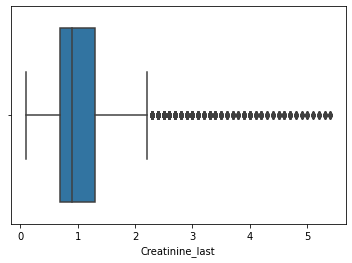

In [75]:
sns.boxplot(x=T['Creatinine_last']) 

In [71]:
T['Creatinine_last'].describe() #Sono da eliminare un pò di outliers 

count    6000.000000
mean        1.358166
std         1.373103
min         0.100000
25%         0.700000
50%         0.900000
75%         1.400000
max        15.800000
Name: Creatinine_last, dtype: float64

In [72]:
#Chebyshev’s Theorem:
T[T['Creatinine_last']>5.477475].shape # values > mean + 3std
#df_numerical[df_numerical['Annual_Premium']<-20000].shape values < mean - 3std

(163, 62)

In [74]:
#Removing outliers
T = T[T.Creatinine_last < 5.477475]
T.reset_index(drop = True, inplace = True)

T #non sono sicura di averli rimossi perchè il il dataset andrebbe ridefinito (stesso problema di filled) ma sono troppe colonne quindi suca

,recordid,SAPS-I,SOFA,Age,Gender,Weight,CCU,CSRU,SICU,GCS_first,...,WBC_first,BUN_last,Creatinine_last,HCO3_last,HCT_last,K_last,Mg_last,Na_last,Platelets_last,WBC_last
0,141821,-1,-1,88.0,0.0,61.9,0,0,1,15.0,...,12.843945,25.41707,1.361799,24.225024,30.873264,4.068046,2.046234,138.886303,192.309419,12.278962
1,141594,11,1,28.0,0.0,57.0,0,0,1,14.0,...,24.000000,17.00000,0.800000,29.000000,26.200000,4.400000,2.000000,139.000000,266.000000,16.600000
2,142659,15,6,88.0,1.0,90.7,1,0,0,15.0,...,19.500000,39.00000,1.600000,21.000000,32.600000,3.700000,2.200000,136.000000,109.000000,15.900000
3,134268,11,3,75.0,1.0,90.8,1,0,0,15.0,...,11.100000,31.00000,2.000000,27.000000,28.900000,4.100000,2.700000,142.000000,229.000000,10.000000
4,134527,9,1,72.0,0.0,63.6,1,0,0,15.0,...,15.100000,14.00000,0.600000,27.000000,33.600000,4.100000,2.300000,137.000000,180.000000,16.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,141881,11,-1,67.0,0.0,82.7,0,0,0,15.0,...,12.200000,5.00000,0.500000,32.000000,34.700000,3.800000,2.400000,139.000000,364.000000,7.800000
5833,149608,10,1,86.0,0.0,48.3,0,0,0,15.0,...,11.100000,16.00000,0.800000,29.000000,31.200000,3.900000,2.500000,143.000000,192.000000,7.200000
5834,134664,13,4,46.0,1.0,104.4,0,0,0,15.0,...,21.500000,16.00000,1.000000,22.000000,36.400000,3.800000,1.700000,135.000000,106.000000,14.100000
5835,144869,16,12,58.0,1.0,70.0,0,0,0,7.0,...,7.600000,51.00000,3.900000,17.000000,26.000000,4.100000,1.900000,142.000000,188.000000,8.100000


<AxesSubplot:xlabel='Creatinine_last'>

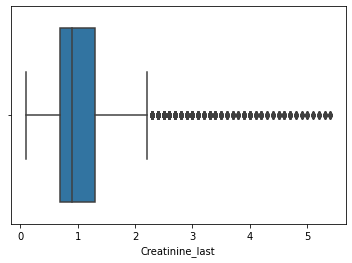

In [76]:
sns.boxplot(x=T['Creatinine_last'])

In [14]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train_filled,y_train)
y_pred=model.predict(X_test_filled)

from sklearn.metrics import f1_score
print("f1_test: ", f1_score(y_test, y_pred))

f1_test:  0.43302180685358255


# Classification Tree

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,10],
              'min_samples_split': [20],
              'min_samples_leaf': [10]}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train_filled, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test_filled)
hyperp_search(classifier,parameters)


model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)


f1_train: 0.324863 using {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[10000] }


hyperp_search(classifier,parameters)

model = LogisticRegression(C=1, max_iter=1000)

#fpr4,tpr4=roc(model,X_train_filled,y_train,X_test_filled,y_test)

f1_train: 0.363064 using {'C': 10, 'max_iter': 10000}


# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(37)}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train_filled, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test_filled)

    print("f1_test: ", f1_score(y_test, y_pred))
   # print(confusion_matrix(y_test, y_pred))
     #print(classification_report(y_test, y_pred))

hyperp_search(classifier,parameters)

model_knn = KNeighborsClassifier(n_neighbors=37)

f1_train: 0.155341 using {'n_neighbors': 1}
f1_test:  0.14977973568281935
